# COS 470 - Image Processing and Computer Vision

#  Sports Image Classification
### Authors: Ethan Gilles, Josh Thyng, Sam Fickett

---

## Importing libraries

In [18]:
import os
import sys
import math
import torch
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.transforms as transforms
import torch.optim as optim

## Setup cuda drivers

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

device(type='cuda')

## Data pre-processing

In [24]:
# Apply image transformations to the data sets to make them more robust.
img_transforms  = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.25), # 20% chance for horizontal flip
    transforms.RandomVerticalFlip(p=0.25),   # 25% change for vertical flip
    transforms.RandomRotation(degrees=45),   # Rotates to a random angle between -45 and 45 degrees
    transforms.ToTensor(),                   # Makes it a PyTorch Tensor

    # Normalization values reused from a source on Kaggle
    # other norm values could be used depending on accuracy:
    # ImageNet -> mean=[0.485, 0.456, 0.406] std=[0.229, 0.224, 0.225]
    
    transforms.Normalize(mean=[-0.0932, -0.0971, -0.1260], std=[0.5091, 0.4912, 0.4931])
])

# Use image folder to load the images and apply transforms
train_data = ImageFolder(root='train', transform=img_transforms)
validation_data = ImageFolder(root='valid', transform=img_transforms)
test_data = ImageFolder(root='test', transform=img_transforms)

len(train_data), len(validation_data), len(test_data)

(13492, 500, 500)

## Create / Visualize Data

In [27]:
# Assign training variables
# Batch-size
batch = 32
# Number of processes used to load the data
workers = 2

train_dataloader = DataLoader(dataset=train_data, batch_size=batch, shuffle=True, num_workers=workers)
validation_dataloader = DataLoader(dataset=validation_data, batch_size=batch, shuffle=False, num_workers=workers)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch, shuffle=False, num_workers=workers)


In [29]:
# Visualization function
def visualize(dataloader):
  images, labels = next(iter(dataloader))
  grid = make_grid(images, nrow=8, normalize=True)
  plt.figure(figsize=(16, 16))
  plt.imshow(np.transpose(grid, (1, 2, 0)))
  plt.show()

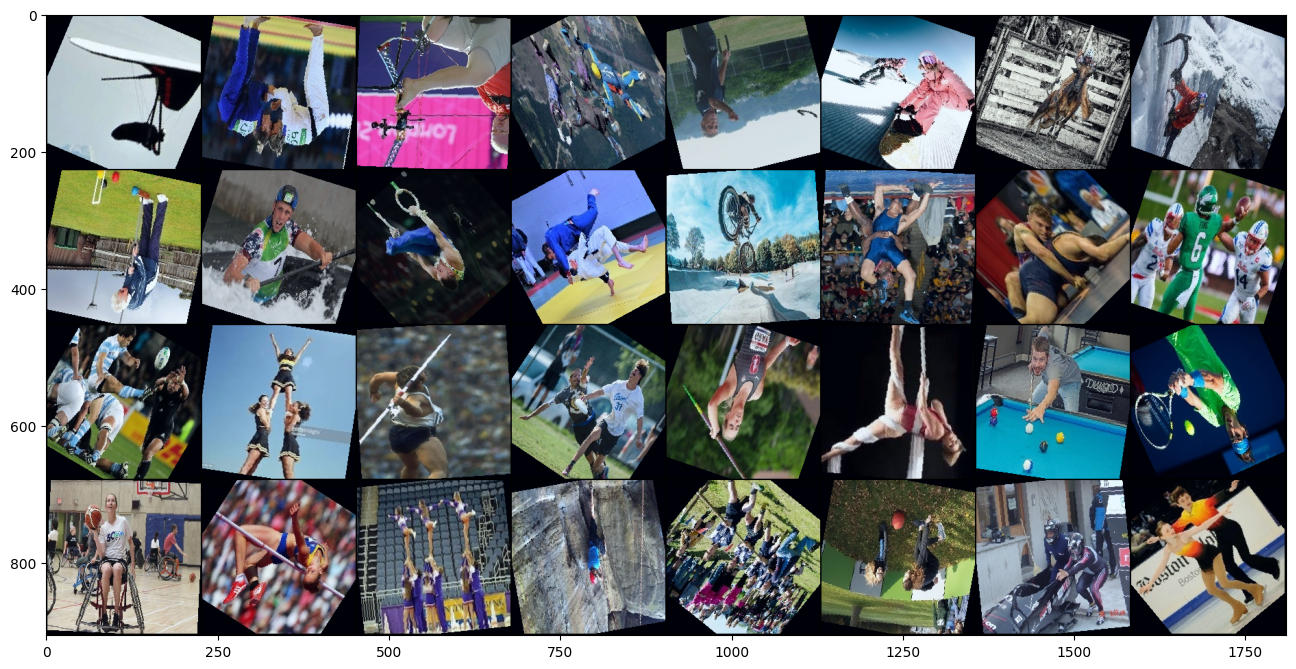

In [31]:
# Training set
visualize(train_dataloader)